## Plot Multi-class SGD 
The `SGDClassifier` estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (learning rate). 

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The following example plots decision surface of multi-class SGD on dataset. The hyperplanes corresponding to the three "one vs rest" classifiers are represented by the dashed lines.

1. Load the data

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Import libraries
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

# Import the datasets
iris = datasets.load_iris()
# Take only the first two features
X = iris["data"][:, :2]
y = iris["target"]
colors = "bry"

2. Pre-process the data

In [3]:
# Shuffle the data
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize the data
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

3. Train the SGD Classifier

In [4]:
# Load the classifier
clf = SGDClassifier(alpha=0.001, max_iter=100)
clf.fit(X, y)

SGDClassifier(alpha=0.001, max_iter=100)

4. Plot the data and decision boundaries

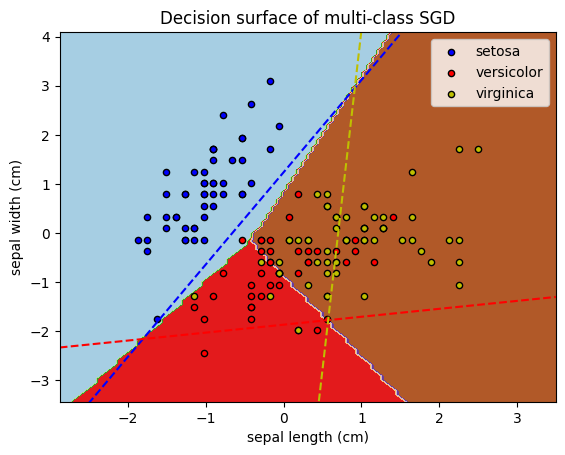

In [6]:
# Plot the decision boundary
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    estimator=clf,
    X=X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris["feature_names"][0],
    ylabel=iris["feature_names"][1],
)
plt.axis("tight")

# Plot the training points
for i, color in zip(clf.classes_, colors):
    idx=np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris["target_names"][i],
        edgecolors="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one vs rest classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()